In [134]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
import sklearn.metrics as metrics

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [136]:
df = pd.read_csv("Train.csv")

In [137]:
target_sort = df.sort_values("target", ascending = False)

In [138]:
target_sort.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
1168,52404016: Ward 16,1812.84373,8968.41740,55.528423,0.142060,0.776898,0.014414,0.000000,0.000564,0.000000,...,0.038813,0.011813,0.043744,0.775224,0,0,ZA5244016,-28.606415,30.547898,0.000000
1619,93403001: Ward 1,4453.24928,17416.69214,52.601169,0.752216,0.241857,0.000242,0.000865,0.000000,0.000000,...,0.195580,0.049354,0.038661,0.033473,0,0,ZA9343001,-22.814838,30.294578,2.195359
1164,52404012: Ward 12,2138.10995,8431.81681,52.248392,0.113834,0.845846,0.031394,0.000505,0.000000,0.000584,...,0.048340,0.053918,0.007087,0.762259,0,0,ZA5244012,-28.400486,30.423585,0.000000
1165,52404013: Ward 13,1944.47033,7882.14294,52.171511,0.104686,0.863125,0.014763,0.000000,0.001112,0.000000,...,0.004201,0.000000,0.001285,0.955767,0,0,ZA5244013,-28.786121,30.606984,0.000000
1158,52404006: Ward 6,2149.91372,10155.40878,52.010403,0.181691,0.784911,0.020055,0.001843,0.001057,0.000000,...,0.046107,0.023015,0.006049,0.452690,0,0,ZA5244006,-28.756320,30.304990,0.156689


<AxesSubplot:xlabel='target', ylabel='Count'>

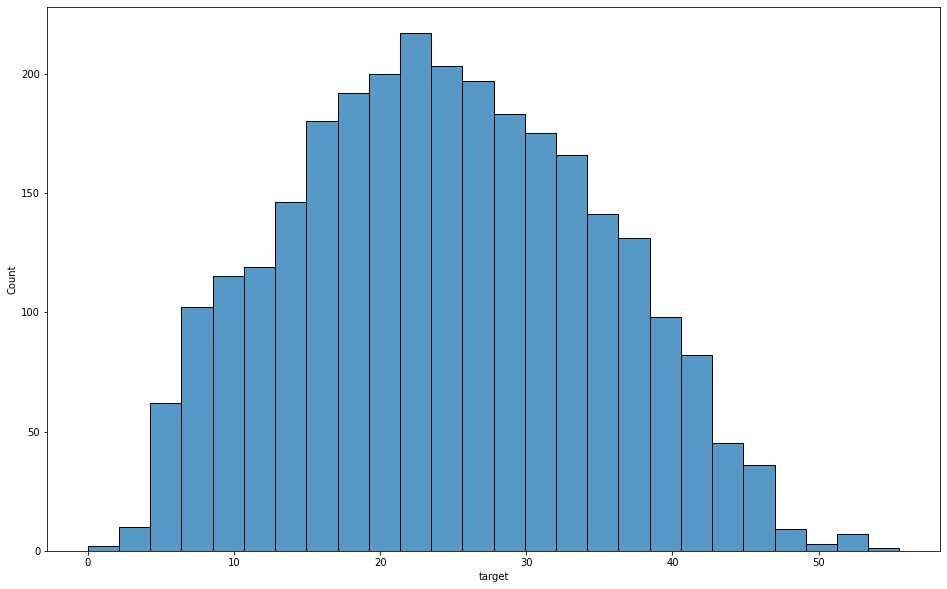

In [139]:
sns.histplot(df["target"])

In [140]:
df.target.describe()

count    2822.000000
mean       24.507554
std        10.294387
min         0.000000
25%        16.751556
50%        24.156670
75%        32.226553
max        55.528423
Name: target, dtype: float64

In [141]:
df.target.median()

24.15666997865

In [142]:

# create bins 

bin_labels = ['low', 'medium', 'high']
df['target_bin'] = pd.qcut(df['target'],
                              q=3,
                              labels=bin_labels)

In [143]:
corr = df.corr()

# __Create baseline model__

get variables which correlate > 0.5 with target 

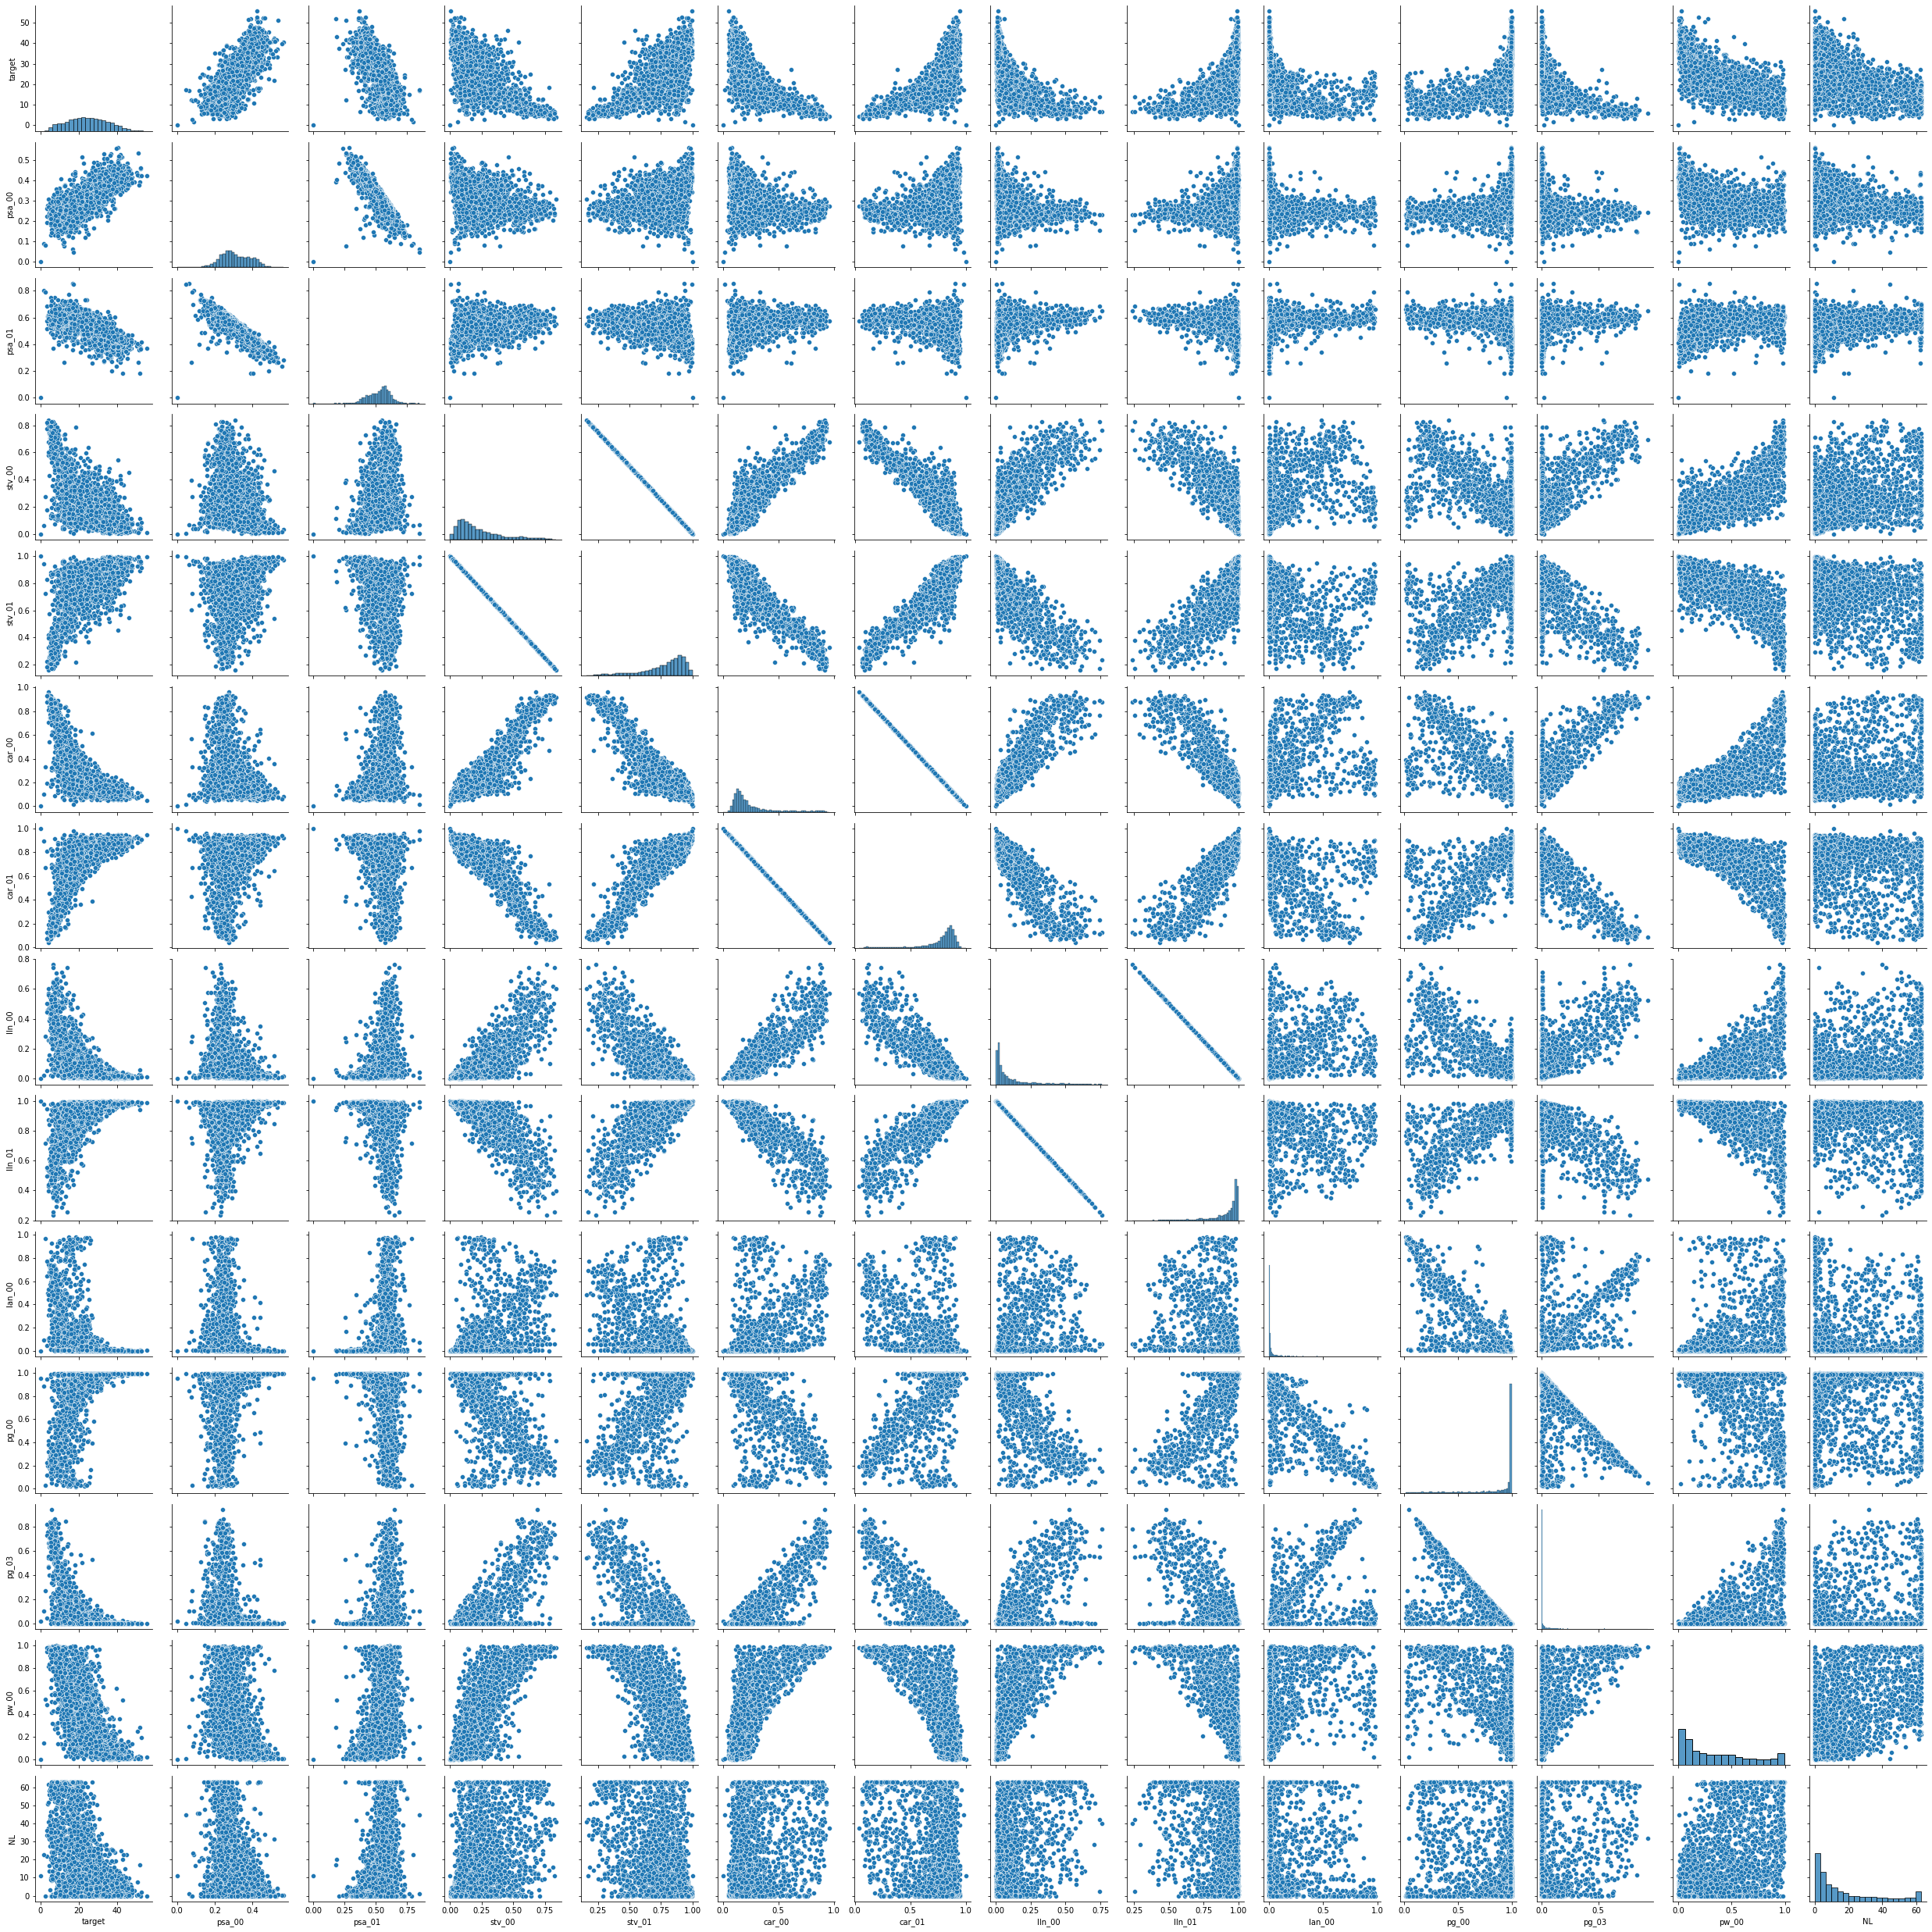

In [144]:
#correlation
corr = df.corr()
corr.head()
corr_price_p = corr[abs(corr["target"]) > 0.5]
corr_price_p.sort_values("target")

#index to list

corr_list_p = corr_price_p.index.values.tolist()
corr_list_p

#subset data frame to those which correlate with price
df_corr_p = df.loc[:,corr_list_p] # :, to access columns

#make pairplot
sns.pairplot(df_corr_p)

In [145]:
#list of features with correlation > 0.5 to target
corr_list_p

#drop target
#corr_list_p.remove("target")
corr_list_p

['target',
 'psa_00',
 'psa_01',
 'stv_00',
 'stv_01',
 'car_00',
 'car_01',
 'lln_00',
 'lln_01',
 'lan_00',
 'pg_00',
 'pg_03',
 'pw_00',
 'NL']

In [146]:


#define X and y values
X = df[corr_list_p]
y = df["target"]

#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X, y)
y_train_pred = lm.predict(X)

#evaluation metrics
print(f"MSE: {mean_squared_error(y, y_train_pred)}")
print(f"R2: {r2_score(y, y_train_pred)}")
print("AIC?")

MSE: 6.29696781699332e-28
R2: 1.0
AIC?


# __linear model with "whole" data:__

In [147]:
RSEED = 1

#read data train 
df = pd.read_csv("Train.csv")

#define X and y values
X = df.drop("target", axis =1)
X = X.drop(["ward","ADM4_PCODE"], axis = 1)
y = df["target"]

#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X, y)

#prediction on training data
y_train_pred = lm.predict(X_train)

#prediction on test data
y_test_pred = lm.predict(X_test)

#evaluation metrics train
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"RMSE: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print("AIC?")

#evaluation metrics test
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}")
print("AIC?")

MSE: 14.333402454991843
R2: 0.8667480418486762
RMSE: 3.785948025923209
AIC?
MSE: 14.03640982646363
R2: 0.8625704837147573
RMSE: 3.746519695192277
AIC?


In [148]:
test = pd.read_csv("Test.csv")
test.head()


,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [149]:
#read data train 
test = pd.read_csv("Test.csv")

#define X and y values
#X = df.drop("target", axis =1)
X = test.drop(["ward","ADM4_PCODE"], axis = 1)
y = df["target"]

#prediction on test data
y_test_pred = lm.predict(X)

#evaluation metrics
print(f"MSE: {mean_squared_error(y, y_test_pred)}")
print(f"R2: {r2_score(y, y_train_pred)}")
print(f"RMSE: {mean_squared_error(y, y_test_pred, squared=False)}")
print("AIC?")

ValueError: Found input variables with inconsistent numbers of samples: [2822, 1013]

In [ ]:
metrics.r2_score(y, y_train_pred)

__Residualplots__

In [ ]:
fig, ax = plt.subplots(round(len(corr_list_p) / 3), 3, figsize = (20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(corr_list_p) - 1:
        sns.residplot(x=corr_list_p[i],y=y, data=df, ax=ax)

In [ ]:
from statsmodels.api import OLS
OLS(y,X).fit().summary()

In [ ]:
high_target = df[df.target_bin == "high"]
high_target.head()

In [ ]:
# plot zipcodes on map

import plotly.graph_objects as go
import plotly.express as px

color = ["red" for i in range(0,len(df["ward"]))]

  
fig = px.scatter_mapbox(df, lat="lat", lon="lon", zoom=3, height=500, size = "target", size_max = 10, color_discrete_sequence=['red'])
fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=8, mapbox_center_lat = -28.606415, mapbox_center_lon = 30.547898, margin={"r":0,"t":50,"l":0,"b":0}, title = 'zipcodes', )

fig.show()